In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("jessicali9530/honey-production")
# print(path)

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  
    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06
[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]

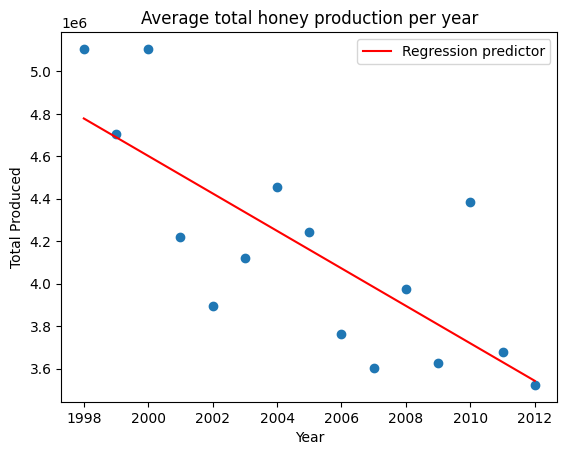

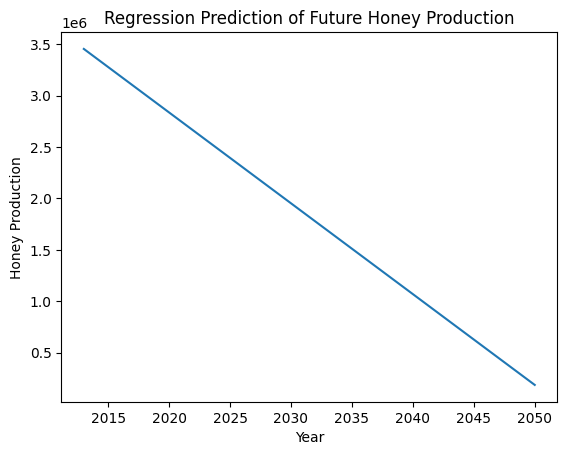

In [21]:
csv_file = os.path.join(path, "honeyproduction.csv")  # Use the actual filename here
df = pd.read_csv(csv_file)

# View the data
print(df.head())

prod_per_year = df.groupby("year").totalprod.mean().reset_index()
print(prod_per_year)

# Setting up X and y for linear regression model
X = prod_per_year["year"]
X = X.values.reshape(-1,1)
print(X)
y = prod_per_year["totalprod"]
print(y)
# Plotting as a scatter plot
plt.scatter(X, y)
plt.title("Average total honey production per year")
plt.xlabel("Year")
plt.ylabel("Total Produced")

regr = linear_model.LinearRegression()
regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

# Creating the predicted values
# y_predict = [regr.coef_ * x + regr.intercept_ for x in X]
y_predict = regr.predict(X)

# Plotting predicted values imposed on original data
plt.plot(X, y_predict, color='Red', label="Regression predictor")
plt.legend()
plt.show()

X_future = np.array(range(2013,2051))
X_future = X_future.reshape(-1,1) # turn it to one big vector not a list

# future_predict = [regr.coef_ * x + regr.intercept_ for x in X_future]
future_predict = regr.predict(X_future)
plt.plot(X_future, future_predict)
plt.title("Regression Prediction of Future Honey Production")
plt.xlabel("Year")
plt.ylabel("Honey Production")
plt.show()